<a href="https://colab.research.google.com/github/mars-orbiter/RC-transient/blob/main/RC_transient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries required
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
import scipy.optimize as so

In [2]:
url = 'https://raw.githubusercontent.com/mars-orbiter/RC-transient/main/keshav.csv'
dataset = pd.read_csv(url, encoding='utf-8')
print(dataset)

         Time  Voltage
0    0.000001    0.220
1    0.004000    0.268
2    0.008000    0.341
3    0.012000    0.405
4    0.016000    0.454
..        ...      ...
995  1.980000    0.010
996  1.984000    0.010
997  1.988000    0.010
998  1.992000    0.010
999  1.996000    0.010

[1000 rows x 2 columns]


In [3]:
# accessing the different columns of the csv dataset I made above
dataset.columns = ["Time","Voltage"]
#storing values for each column into a separate list
Time = np.array(dataset.Time)
Voltage = np.array(dataset.Voltage)

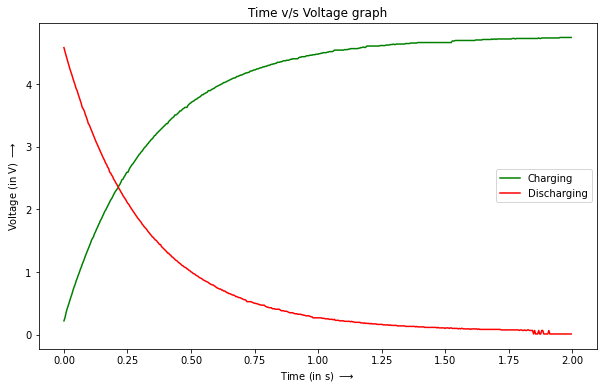

In [6]:
plt.plot(Time[0:500],Voltage[0:500],'g',label = 'Charging')
plt.plot(Time[500:1000],Voltage[500:1000],'r',label = 'Discharging')

plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel(r"Time (in s) $\longrightarrow$")
plt.ylabel(r"Voltage (in V) $\longrightarrow$")
plt.title("Time v/s Voltage graph")
plt.legend()
plt.show()

In [55]:
import warnings
warnings.filterwarnings("ignore")

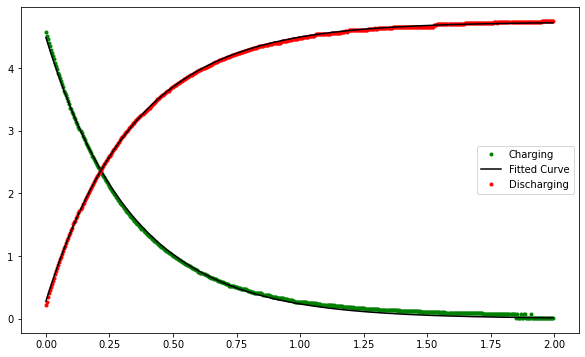

In [62]:
R = 220
C = 10**(-5)

def func1(x1, a, b):
    return a * np.exp(-b*x1/(R*C))

def func2(x2, a, b,c):
    return (1- a * np.exp(-b*x2/(R*C))+ c)

x1= Time[500:1000]
yn1 = Voltage[500:1000]
# yn1 = y1 + 0.02*np.random.normal(size=len(x1))
popt1, pcov1 = curve_fit(func1, x1, yn1)

x2= Time[0:500]
yn2 = Voltage[0:500]
# yn2 = y2 + 0.02*np.random.normal(size=len(x2))
popt2, pcov2 = curve_fit(func2, x2, yn2)

plt.figure()
plt.plot(x1, yn1, 'g.', label="Charging")
plt.plot(x1, func1(x1, *popt1), 'k-', label="Fitted Curve")

plt.plot(x2, yn2, 'r.', label="Discharging")
plt.plot(x2, func2(x2, *popt2), 'k-')
plt.legend()
plt.show()